In [3]:
import os, shutil
original_dataset_dir = './dogs-vs-cats'
base_dir = './cats_and_dogs_small'

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,  "train", fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [17]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [18]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-07-21 19:54:54.986526: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/lollijagladiseva/anaconda3/envs/pytorch_keras/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [29]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory( validation_dir, 
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [43]:
import os
batch_size=20

train_dir = '/Users/lollijagladiseva/Desktop/keras_sandbox/cats_and_dogs_small/train'
validation_dir = '/Users/lollijagladiseva/Desktop/keras_sandbox/cats_and_dogs_small/validation'

num_train_samples = sum([len(files) for r, d, files in os.walk(train_dir)])
num_validation_samples = sum([len(files) for r, d, files in os.walk(validation_dir)])

steps_per_epoch = num_train_samples // batch_size
validation_steps = num_validation_samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Epoch 1/30
 71/100 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - acc: 0.4924 - loss: 0.6955

KeyboardInterrupt: 

In [34]:
model.save('cats_and_dogs_small_1.h5')

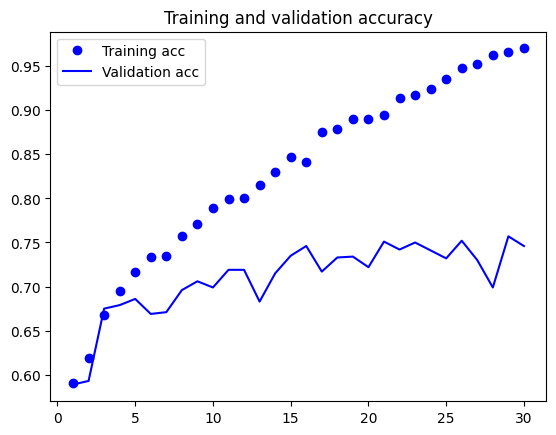

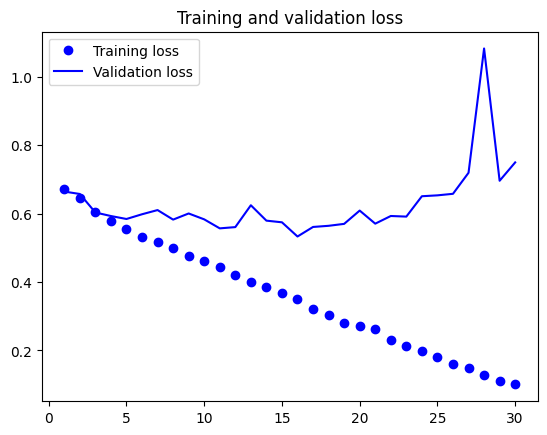

In [38]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/Users/lollijagladiseva/anaconda3/envs/pytorch_keras/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 63/100 ━━━━━━━━━━━━━━━━━━━━ 16s 454ms/step - acc: 0.5110 - loss: 0.6960

2024-07-21 20:46:44.234865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/lollijagladiseva/anaconda3/envs/pytorch_keras/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 337ms/step - acc: 0.5073 - loss: 0.6956 - val_acc: 0.5000 - val_loss: 0.6892
Epoch 2/100


2024-07-21 20:46:49.382030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.5209 - loss: 0.6904

2024-07-21 20:47:17.519920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 314ms/step - acc: 0.5260 - loss: 0.6899 - val_acc: 0.5820 - val_loss: 0.6813
Epoch 3/100


2024-07-21 20:47:22.611723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 16s 435ms/step - acc: 0.5607 - loss: 0.6844

2024-07-21 20:47:51.765436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - acc: 0.5591 - loss: 0.6841 - val_acc: 0.5620 - val_loss: 0.6702
Epoch 4/100


2024-07-21 20:47:56.427329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - acc: 0.5638 - loss: 0.6798

2024-07-21 20:48:25.013536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 314ms/step - acc: 0.5672 - loss: 0.6785 - val_acc: 0.5980 - val_loss: 0.6657
Epoch 5/100


2024-07-21 20:48:29.646982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - acc: 0.5773 - loss: 0.6657

2024-07-21 20:48:57.833349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 303ms/step - acc: 0.5728 - loss: 0.6673 - val_acc: 0.5930 - val_loss: 0.6572
Epoch 6/100


2024-07-21 20:49:02.027293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 416ms/step - acc: 0.5858 - loss: 0.6612

2024-07-21 20:49:29.939738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 310ms/step - acc: 0.5846 - loss: 0.6624 - val_acc: 0.6230 - val_loss: 0.6497
Epoch 7/100


2024-07-21 20:49:34.805389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 408ms/step - acc: 0.6145 - loss: 0.6564

2024-07-21 20:50:02.638525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 300ms/step - acc: 0.6138 - loss: 0.6563 - val_acc: 0.6290 - val_loss: 0.6417
Epoch 8/100


2024-07-21 20:50:06.997996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 414ms/step - acc: 0.6198 - loss: 0.6462

2024-07-21 20:50:34.886763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 305ms/step - acc: 0.6136 - loss: 0.6482 - val_acc: 0.6340 - val_loss: 0.6289
Epoch 9/100


2024-07-21 20:50:39.343588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.6230 - loss: 0.6425

2024-07-21 20:51:07.630108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - acc: 0.6243 - loss: 0.6420 - val_acc: 0.6480 - val_loss: 0.6217
Epoch 10/100


2024-07-21 20:51:11.874264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 404ms/step - acc: 0.6350 - loss: 0.6412

2024-07-21 20:51:39.185410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 298ms/step - acc: 0.6335 - loss: 0.6402 - val_acc: 0.6090 - val_loss: 0.6331
Epoch 11/100


2024-07-21 20:51:43.599102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 420ms/step - acc: 0.6311 - loss: 0.6275

2024-07-21 20:52:11.851399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 310ms/step - acc: 0.6324 - loss: 0.6287 - val_acc: 0.6420 - val_loss: 0.6145
Epoch 12/100


2024-07-21 20:52:16.493471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 423ms/step - acc: 0.6470 - loss: 0.6266

2024-07-21 20:52:45.091994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - acc: 0.6429 - loss: 0.6278 - val_acc: 0.6690 - val_loss: 0.5993
Epoch 13/100


2024-07-21 20:52:49.594576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.6699 - loss: 0.6128

2024-07-21 20:53:17.966788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - acc: 0.6644 - loss: 0.6140 - val_acc: 0.6750 - val_loss: 0.5948
Epoch 14/100


2024-07-21 20:53:22.775327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.6479 - loss: 0.6207

2024-07-21 20:53:51.259064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 313ms/step - acc: 0.6507 - loss: 0.6176 - val_acc: 0.6640 - val_loss: 0.5931
Epoch 15/100


2024-07-21 20:53:56.255263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 421ms/step - acc: 0.6732 - loss: 0.5918

2024-07-21 20:54:24.896975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - acc: 0.6700 - loss: 0.5963 - val_acc: 0.6600 - val_loss: 0.5985
Epoch 16/100


2024-07-21 20:54:29.552642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - acc: 0.6681 - loss: 0.6004

2024-07-21 20:54:57.433435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 307ms/step - acc: 0.6668 - loss: 0.6016 - val_acc: 0.6780 - val_loss: 0.5968
Epoch 17/100


2024-07-21 20:55:02.192813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - acc: 0.6765 - loss: 0.6043

2024-07-21 20:55:30.396863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - acc: 0.6763 - loss: 0.6012 - val_acc: 0.6490 - val_loss: 0.6217
Epoch 18/100


2024-07-21 20:55:34.822903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - acc: 0.6845 - loss: 0.5867

2024-07-21 20:56:02.964326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - acc: 0.6818 - loss: 0.5882 - val_acc: 0.6690 - val_loss: 0.5899
Epoch 19/100


2024-07-21 20:56:07.647401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 422ms/step - acc: 0.6644 - loss: 0.6066

2024-07-21 20:56:36.290212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - acc: 0.6678 - loss: 0.6015 - val_acc: 0.6630 - val_loss: 0.5970
Epoch 20/100


2024-07-21 20:56:41.203581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - acc: 0.6959 - loss: 0.5776

2024-07-21 20:57:09.661603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 307ms/step - acc: 0.6932 - loss: 0.5788 - val_acc: 0.6930 - val_loss: 0.5586
Epoch 21/100


2024-07-21 20:57:14.169962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - acc: 0.6572 - loss: 0.6007

2024-07-21 20:57:42.894786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - acc: 0.6625 - loss: 0.5971 - val_acc: 0.6460 - val_loss: 0.6336
Epoch 22/100


2024-07-21 20:57:47.658031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - acc: 0.6805 - loss: 0.5789

2024-07-21 20:58:15.714569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 302ms/step - acc: 0.6818 - loss: 0.5795 - val_acc: 0.6860 - val_loss: 0.5795
Epoch 23/100


2024-07-21 20:58:20.025802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.6479 - loss: 0.5975

2024-07-21 20:58:48.317680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - acc: 0.6591 - loss: 0.5899 - val_acc: 0.6890 - val_loss: 0.5664
Epoch 24/100


2024-07-21 20:58:52.753831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - acc: 0.6995 - loss: 0.5684

2024-07-21 20:59:20.571335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 301ms/step - acc: 0.6997 - loss: 0.5701 - val_acc: 0.6820 - val_loss: 0.5774
Epoch 25/100


2024-07-21 20:59:24.732548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.7229 - loss: 0.5608

2024-07-21 20:59:52.775527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - acc: 0.7202 - loss: 0.5635 - val_acc: 0.7090 - val_loss: 0.5583
Epoch 26/100


2024-07-21 20:59:57.685250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 425ms/step - acc: 0.6888 - loss: 0.5585

2024-07-21 21:00:26.525800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - acc: 0.6911 - loss: 0.5621 - val_acc: 0.7160 - val_loss: 0.5428
Epoch 27/100


2024-07-21 21:00:31.034921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 418ms/step - acc: 0.7144 - loss: 0.5625

2024-07-21 21:00:59.259003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 307ms/step - acc: 0.7146 - loss: 0.5605 - val_acc: 0.7230 - val_loss: 0.5432
Epoch 28/100


2024-07-21 21:01:03.714254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 418ms/step - acc: 0.7037 - loss: 0.5671

2024-07-21 21:01:31.885430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 307ms/step - acc: 0.7046 - loss: 0.5653 - val_acc: 0.7000 - val_loss: 0.5624
Epoch 29/100


2024-07-21 21:01:36.358228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 424ms/step - acc: 0.7215 - loss: 0.5423

2024-07-21 21:02:04.949102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 313ms/step - acc: 0.7189 - loss: 0.5484 - val_acc: 0.7330 - val_loss: 0.5325
Epoch 30/100


2024-07-21 21:02:09.627370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 424ms/step - acc: 0.7241 - loss: 0.5497

2024-07-21 21:02:38.376164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - acc: 0.7235 - loss: 0.5489 - val_acc: 0.7170 - val_loss: 0.5539
Epoch 31/100


2024-07-21 21:02:43.135250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 428ms/step - acc: 0.7050 - loss: 0.5591

2024-07-21 21:03:11.879234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - acc: 0.7078 - loss: 0.5563 - val_acc: 0.7300 - val_loss: 0.5228
Epoch 32/100


2024-07-21 21:03:16.229848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 421ms/step - acc: 0.7150 - loss: 0.5518

2024-07-21 21:03:44.664772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - acc: 0.7132 - loss: 0.5535 - val_acc: 0.7330 - val_loss: 0.5239
Epoch 33/100


2024-07-21 21:03:49.011069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 418ms/step - acc: 0.7106 - loss: 0.5596

2024-07-21 21:04:17.172361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 305ms/step - acc: 0.7122 - loss: 0.5575 - val_acc: 0.6760 - val_loss: 0.6231
Epoch 34/100


2024-07-21 21:04:21.450625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 419ms/step - acc: 0.7333 - loss: 0.5283

2024-07-21 21:04:49.642410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 310ms/step - acc: 0.7262 - loss: 0.5369 - val_acc: 0.7250 - val_loss: 0.5361
Epoch 35/100


2024-07-21 21:04:54.337364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 422ms/step - acc: 0.7424 - loss: 0.5242

2024-07-21 21:05:22.793286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - acc: 0.7378 - loss: 0.5285 - val_acc: 0.6870 - val_loss: 0.6056
Epoch 36/100


2024-07-21 21:05:27.100328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 422ms/step - acc: 0.7273 - loss: 0.5488

2024-07-21 21:05:55.526637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - acc: 0.7281 - loss: 0.5440 - val_acc: 0.6820 - val_loss: 0.6253
Epoch 37/100


2024-07-21 21:05:59.891718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 425ms/step - acc: 0.7422 - loss: 0.5319

2024-07-21 21:06:28.499310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 309ms/step - acc: 0.7383 - loss: 0.5340 - val_acc: 0.7290 - val_loss: 0.5196
Epoch 38/100


2024-07-21 21:06:32.781893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 415ms/step - acc: 0.7306 - loss: 0.5448

2024-07-21 21:07:00.631670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 306ms/step - acc: 0.7304 - loss: 0.5423 - val_acc: 0.7360 - val_loss: 0.5154
Epoch 39/100


2024-07-21 21:07:05.128665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 414ms/step - acc: 0.7419 - loss: 0.5241

2024-07-21 21:07:33.097064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - acc: 0.7366 - loss: 0.5278 - val_acc: 0.7270 - val_loss: 0.5130
Epoch 40/100


2024-07-21 21:07:37.854591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 417ms/step - acc: 0.7359 - loss: 0.5263

2024-07-21 21:08:06.312270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - acc: 0.7365 - loss: 0.5282 - val_acc: 0.7370 - val_loss: 0.5232
Epoch 41/100


2024-07-21 21:08:11.208167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 402ms/step - acc: 0.7377 - loss: 0.5129

2024-07-21 21:08:38.610308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 294ms/step - acc: 0.7337 - loss: 0.5192 - val_acc: 0.7330 - val_loss: 0.5108
Epoch 42/100


2024-07-21 21:08:42.753781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - acc: 0.7507 - loss: 0.5148

2024-07-21 21:09:08.726363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 287ms/step - acc: 0.7469 - loss: 0.5159 - val_acc: 0.7550 - val_loss: 0.5055
Epoch 43/100


2024-07-21 21:09:13.274626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 398ms/step - acc: 0.7200 - loss: 0.5266

2024-07-21 21:09:40.134735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 296ms/step - acc: 0.7217 - loss: 0.5262 - val_acc: 0.7450 - val_loss: 0.5108
Epoch 44/100


2024-07-21 21:09:44.793619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - acc: 0.7296 - loss: 0.5349

2024-07-21 21:10:11.578139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 297ms/step - acc: 0.7325 - loss: 0.5336 - val_acc: 0.7520 - val_loss: 0.5046
Epoch 45/100


2024-07-21 21:10:16.346420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - acc: 0.7411 - loss: 0.5204

2024-07-21 21:10:42.736949: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 290ms/step - acc: 0.7403 - loss: 0.5202 - val_acc: 0.7340 - val_loss: 0.5251
Epoch 46/100


2024-07-21 21:10:47.265832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - acc: 0.7370 - loss: 0.5455

2024-07-21 21:11:13.473970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 288ms/step - acc: 0.7381 - loss: 0.5388 - val_acc: 0.7430 - val_loss: 0.5242
Epoch 47/100


2024-07-21 21:11:17.728111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 387ms/step - acc: 0.7382 - loss: 0.5095

2024-07-21 21:11:43.624503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 287ms/step - acc: 0.7370 - loss: 0.5133 - val_acc: 0.7260 - val_loss: 0.5410
Epoch 48/100


2024-07-21 21:11:48.030172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 392ms/step - acc: 0.7452 - loss: 0.5152

2024-07-21 21:12:14.487078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 293ms/step - acc: 0.7390 - loss: 0.5191 - val_acc: 0.7480 - val_loss: 0.5103
Epoch 49/100


2024-07-21 21:12:19.138040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 399ms/step - acc: 0.7253 - loss: 0.5180

2024-07-21 21:12:46.230775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 298ms/step - acc: 0.7266 - loss: 0.5187 - val_acc: 0.7160 - val_loss: 0.5253
Epoch 50/100


2024-07-21 21:12:50.959623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - acc: 0.7585 - loss: 0.4917

2024-07-21 21:13:17.602062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 290ms/step - acc: 0.7563 - loss: 0.4992 - val_acc: 0.7480 - val_loss: 0.4977
Epoch 51/100


2024-07-21 21:13:21.826080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 392ms/step - acc: 0.7439 - loss: 0.5130

2024-07-21 21:13:47.943345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 287ms/step - acc: 0.7417 - loss: 0.5132 - val_acc: 0.7390 - val_loss: 0.5058
Epoch 52/100


2024-07-21 21:13:52.097862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.7434 - loss: 0.5022

2024-07-21 21:14:18.210553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 291ms/step - acc: 0.7408 - loss: 0.5066 - val_acc: 0.7200 - val_loss: 0.5303
Epoch 53/100


2024-07-21 21:14:22.863342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 395ms/step - acc: 0.7426 - loss: 0.5037

2024-07-21 21:14:49.568748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 294ms/step - acc: 0.7426 - loss: 0.5041 - val_acc: 0.7450 - val_loss: 0.5178
Epoch 54/100


2024-07-21 21:14:54.152404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - acc: 0.7627 - loss: 0.4968

2024-07-21 21:15:20.440655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 292ms/step - acc: 0.7606 - loss: 0.4944 - val_acc: 0.7320 - val_loss: 0.5363
Epoch 55/100


2024-07-21 21:15:25.057608: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 392ms/step - acc: 0.7301 - loss: 0.5200

2024-07-21 21:15:51.475325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 287ms/step - acc: 0.7323 - loss: 0.5166 - val_acc: 0.7580 - val_loss: 0.4832
Epoch 56/100


2024-07-21 21:15:55.575508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 386ms/step - acc: 0.7334 - loss: 0.5150

2024-07-21 21:16:21.521973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 285ms/step - acc: 0.7388 - loss: 0.5112 - val_acc: 0.7370 - val_loss: 0.5121
Epoch 57/100


2024-07-21 21:16:25.780414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - acc: 0.7650 - loss: 0.4814

2024-07-21 21:16:52.336744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 296ms/step - acc: 0.7600 - loss: 0.4880 - val_acc: 0.7420 - val_loss: 0.5091
Epoch 58/100


2024-07-21 21:16:57.059311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 393ms/step - acc: 0.7317 - loss: 0.5091

2024-07-21 21:17:23.304389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 287ms/step - acc: 0.7342 - loss: 0.5094 - val_acc: 0.7470 - val_loss: 0.4936
Epoch 59/100


2024-07-21 21:17:27.293227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 383ms/step - acc: 0.7713 - loss: 0.4882

2024-07-21 21:17:52.985579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 283ms/step - acc: 0.7673 - loss: 0.4892 - val_acc: 0.7510 - val_loss: 0.4982
Epoch 60/100


2024-07-21 21:17:57.258126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 15s 406ms/step - acc: 0.7542 - loss: 0.4962

2024-07-21 21:18:24.478093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 296ms/step - acc: 0.7543 - loss: 0.4970 - val_acc: 0.7410 - val_loss: 0.4954
Epoch 61/100


2024-07-21 21:18:28.628554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - acc: 0.7561 - loss: 0.4952

2024-07-21 21:18:54.992681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - acc: 0.7583 - loss: 0.4925 - val_acc: 0.7770 - val_loss: 0.4678
Epoch 62/100


2024-07-21 21:18:59.382600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step - acc: 0.7569 - loss: 0.4875

2024-07-21 21:19:25.135255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - acc: 0.7567 - loss: 0.4914 - val_acc: 0.7640 - val_loss: 0.4815
Epoch 63/100


2024-07-21 21:19:28.983006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 383ms/step - acc: 0.7631 - loss: 0.4817

2024-07-21 21:19:54.697410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 282ms/step - acc: 0.7616 - loss: 0.4837 - val_acc: 0.7580 - val_loss: 0.4951
Epoch 64/100


2024-07-21 21:19:58.886669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 379ms/step - acc: 0.7506 - loss: 0.5017

2024-07-21 21:20:24.501687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 279ms/step - acc: 0.7515 - loss: 0.5010 - val_acc: 0.7610 - val_loss: 0.4777
Epoch 65/100


2024-07-21 21:20:28.595224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.7431 - loss: 0.5006

2024-07-21 21:20:54.638080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 288ms/step - acc: 0.7464 - loss: 0.4991 - val_acc: 0.7410 - val_loss: 0.5235
Epoch 66/100


2024-07-21 21:20:59.027543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 387ms/step - acc: 0.7383 - loss: 0.5018

2024-07-21 21:21:25.178071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 284ms/step - acc: 0.7421 - loss: 0.4959 - val_acc: 0.7710 - val_loss: 0.4648
Epoch 67/100


2024-07-21 21:21:29.287773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 382ms/step - acc: 0.7649 - loss: 0.4764

2024-07-21 21:21:55.064109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 282ms/step - acc: 0.7642 - loss: 0.4826 - val_acc: 0.7780 - val_loss: 0.4652
Epoch 68/100


2024-07-21 21:21:59.277723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 380ms/step - acc: 0.7655 - loss: 0.4705

2024-07-21 21:22:25.110238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 279ms/step - acc: 0.7623 - loss: 0.4745 - val_acc: 0.7650 - val_loss: 0.4769
Epoch 69/100


2024-07-21 21:22:29.177196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - acc: 0.7711 - loss: 0.4737

2024-07-21 21:22:55.644464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 289ms/step - acc: 0.7716 - loss: 0.4756 - val_acc: 0.7110 - val_loss: 0.5704
Epoch 70/100


2024-07-21 21:22:59.675650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step - acc: 0.7438 - loss: 0.4991

2024-07-21 21:23:25.411107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 278ms/step - acc: 0.7498 - loss: 0.4919 - val_acc: 0.7770 - val_loss: 0.4688
Epoch 71/100


2024-07-21 21:23:29.318760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 387ms/step - acc: 0.7654 - loss: 0.4627

2024-07-21 21:23:55.178137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 287ms/step - acc: 0.7638 - loss: 0.4706 - val_acc: 0.7560 - val_loss: 0.4713
Epoch 72/100


2024-07-21 21:23:59.600305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - acc: 0.7824 - loss: 0.4514

2024-07-21 21:24:25.834234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 288ms/step - acc: 0.7782 - loss: 0.4573 - val_acc: 0.7750 - val_loss: 0.4846
Epoch 73/100


2024-07-21 21:24:30.076847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 380ms/step - acc: 0.7822 - loss: 0.4502

2024-07-21 21:24:55.848550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 278ms/step - acc: 0.7782 - loss: 0.4584 - val_acc: 0.7510 - val_loss: 0.4908
Epoch 74/100


2024-07-21 21:24:59.856265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.7598 - loss: 0.4772

2024-07-21 21:25:25.947188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 287ms/step - acc: 0.7595 - loss: 0.4781 - val_acc: 0.7750 - val_loss: 0.4612
Epoch 75/100


2024-07-21 21:25:30.156289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 13s 378ms/step - acc: 0.7749 - loss: 0.4613

2024-07-21 21:25:55.638255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 276ms/step - acc: 0.7740 - loss: 0.4651 - val_acc: 0.7580 - val_loss: 0.4830
Epoch 76/100


2024-07-21 21:25:59.499368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.7754 - loss: 0.4592

2024-07-21 21:26:25.592067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 288ms/step - acc: 0.7738 - loss: 0.4624 - val_acc: 0.7550 - val_loss: 0.4759
Epoch 77/100


2024-07-21 21:26:29.952946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 383ms/step - acc: 0.7714 - loss: 0.4736

2024-07-21 21:26:55.777725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 280ms/step - acc: 0.7748 - loss: 0.4719 - val_acc: 0.7800 - val_loss: 0.4626
Epoch 78/100


2024-07-21 21:26:59.685933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step - acc: 0.7565 - loss: 0.4821

2024-07-21 21:27:25.258080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 280ms/step - acc: 0.7621 - loss: 0.4774 - val_acc: 0.7710 - val_loss: 0.4779
Epoch 79/100


2024-07-21 21:27:29.288185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 384ms/step - acc: 0.7845 - loss: 0.4729

2024-07-21 21:27:55.132239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 280ms/step - acc: 0.7860 - loss: 0.4649 - val_acc: 0.7720 - val_loss: 0.4727
Epoch 80/100


2024-07-21 21:27:59.008717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 392ms/step - acc: 0.7600 - loss: 0.4740

2024-07-21 21:28:25.465804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - acc: 0.7617 - loss: 0.4740 - val_acc: 0.7700 - val_loss: 0.4698
Epoch 81/100


2024-07-21 21:28:29.741532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.8119 - loss: 0.4275

2024-07-21 21:28:55.998870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 288ms/step - acc: 0.8029 - loss: 0.4361 - val_acc: 0.7790 - val_loss: 0.4636
Epoch 82/100


2024-07-21 21:29:00.360655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 386ms/step - acc: 0.7839 - loss: 0.4536

2024-07-21 21:29:26.494912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 284ms/step - acc: 0.7801 - loss: 0.4564 - val_acc: 0.7680 - val_loss: 0.4834
Epoch 83/100


2024-07-21 21:29:30.664885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 399ms/step - acc: 0.7699 - loss: 0.4526

2024-07-21 21:29:57.589757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 292ms/step - acc: 0.7731 - loss: 0.4527 - val_acc: 0.7690 - val_loss: 0.4643
Epoch 84/100


2024-07-21 21:30:01.724383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - acc: 0.7693 - loss: 0.4604

2024-07-21 21:30:27.882803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - acc: 0.7707 - loss: 0.4621 - val_acc: 0.7550 - val_loss: 0.4860
Epoch 85/100


2024-07-21 21:30:32.361321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 392ms/step - acc: 0.7812 - loss: 0.4628

2024-07-21 21:30:58.866372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 287ms/step - acc: 0.7817 - loss: 0.4625 - val_acc: 0.7810 - val_loss: 0.4540
Epoch 86/100


2024-07-21 21:31:02.940438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - acc: 0.8014 - loss: 0.4381

2024-07-21 21:31:29.123740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 288ms/step - acc: 0.7999 - loss: 0.4409 - val_acc: 0.7600 - val_loss: 0.4866
Epoch 87/100


2024-07-21 21:31:33.468114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 393ms/step - acc: 0.7980 - loss: 0.4399

2024-07-21 21:32:00.084335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - acc: 0.7953 - loss: 0.4427 - val_acc: 0.7880 - val_loss: 0.4399
Epoch 88/100


2024-07-21 21:32:04.320075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - acc: 0.7816 - loss: 0.4649

2024-07-21 21:32:30.704906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 290ms/step - acc: 0.7840 - loss: 0.4625 - val_acc: 0.7840 - val_loss: 0.4593
Epoch 89/100


2024-07-21 21:32:35.126315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - acc: 0.7881 - loss: 0.4479

2024-07-21 21:33:02.017801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 295ms/step - acc: 0.7862 - loss: 0.4500 - val_acc: 0.7700 - val_loss: 0.4763
Epoch 90/100


2024-07-21 21:33:06.599600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.7823 - loss: 0.4549

2024-07-21 21:33:32.937194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 288ms/step - acc: 0.7807 - loss: 0.4550 - val_acc: 0.7850 - val_loss: 0.4465
Epoch 91/100


2024-07-21 21:33:37.294991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - acc: 0.7966 - loss: 0.4406

2024-07-21 21:34:03.623061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 287ms/step - acc: 0.7984 - loss: 0.4390 - val_acc: 0.7840 - val_loss: 0.4537
Epoch 92/100


2024-07-21 21:34:07.865408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 394ms/step - acc: 0.7737 - loss: 0.4514

2024-07-21 21:34:34.526933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - acc: 0.7803 - loss: 0.4478 - val_acc: 0.7390 - val_loss: 0.5487
Epoch 93/100


2024-07-21 21:34:38.666057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - acc: 0.7889 - loss: 0.4417

2024-07-21 21:35:05.477826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 295ms/step - acc: 0.7904 - loss: 0.4420 - val_acc: 0.7940 - val_loss: 0.4538
Epoch 94/100


2024-07-21 21:35:09.695748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - acc: 0.7886 - loss: 0.4458

2024-07-21 21:35:35.513130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 282ms/step - acc: 0.7861 - loss: 0.4450 - val_acc: 0.7880 - val_loss: 0.4566
Epoch 95/100


2024-07-21 21:35:39.605673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 392ms/step - acc: 0.8100 - loss: 0.4259

2024-07-21 21:36:05.933248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 288ms/step - acc: 0.8087 - loss: 0.4263 - val_acc: 0.7060 - val_loss: 0.6202
Epoch 96/100


2024-07-21 21:36:10.147414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 386ms/step - acc: 0.8106 - loss: 0.4262

2024-07-21 21:36:36.012736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 285ms/step - acc: 0.8109 - loss: 0.4246 - val_acc: 0.7680 - val_loss: 0.4873
Epoch 97/100


2024-07-21 21:36:40.317833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step - acc: 0.7988 - loss: 0.4346

2024-07-21 21:37:05.956011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 280ms/step - acc: 0.7963 - loss: 0.4334 - val_acc: 0.7870 - val_loss: 0.4477
Epoch 98/100


2024-07-21 21:37:10.066069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - acc: 0.8029 - loss: 0.4277

2024-07-21 21:37:36.339380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - acc: 0.7996 - loss: 0.4317 - val_acc: 0.7710 - val_loss: 0.4852
Epoch 99/100


2024-07-21 21:37:40.695620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 387ms/step - acc: 0.8025 - loss: 0.4141

2024-07-21 21:38:06.808317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 285ms/step - acc: 0.7975 - loss: 0.4203 - val_acc: 0.7990 - val_loss: 0.4429
Epoch 100/100


2024-07-21 21:38:10.964767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


 63/100 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - acc: 0.8082 - loss: 0.4214

2024-07-21 21:38:37.084289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 291ms/step - acc: 0.8024 - loss: 0.4315 - val_acc: 0.7700 - val_loss: 0.4895


2024-07-21 21:38:41.663108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [49]:
model.save('cats_and_dogs_small_2.h5')

In [51]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

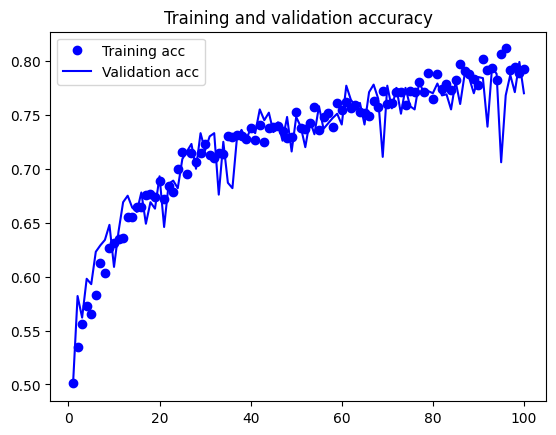

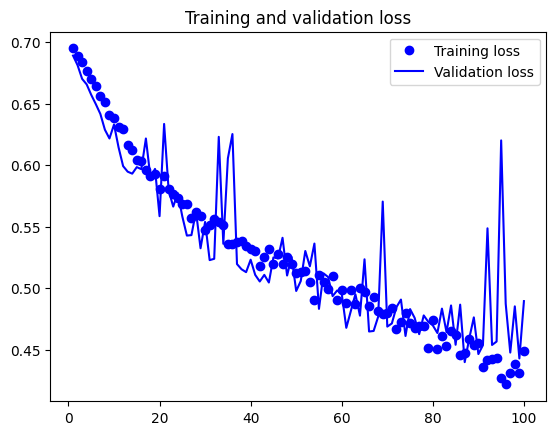

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()